# Mocho glacier DGA 2023-2024
## Snow evolution
##### Paul Sandoval Quilodrán - https://github.com/SQPaul

## import packages

In [1]:
import numpy as np
import pandas as pd

import glob 
import shutil

import geopandas as gpd
import rasterio as rio

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns

from sentinel2 import sentinel2
#from landsat8 import landsat8
#from landsat8_B8 import landsat8_B8
#from landsat5 import landsat5
import rfclas

import imageio

#import warnings
#warnings.filterwarnings('ignore')

# función densidad balizas

In [7]:
def dens_bal(dias_nieve,dias_hielo,dias_totales,densidad_nieve,densidad_hielo):
    d_baliza = (dias_nieve/dias_totales)*densidad_nieve+(dias_hielo/dias_totales)*densidad_hielo
    
    return d_baliza

In [10]:
dens_bal(18,16,34,612,900)

747.5294117647059

# Download Sentinel 2

In [4]:
mask = r"P:\Projects\Mocho_DGA\2023-2024\GIS\mask_sentinel_download.gpkg"
sentinel2(mask,60,"2024-04-01","2024-04-18")

Lista de imágenes disponibles: 


,nubosidad,id,year,day,month
fecha,,,,,
2024-04-09 18:12:54,11.847069,20240409T142711_20240409T143454_T18GYA,2024,9,4
2024-04-09 18:12:54,10.755506,20240409T142711_20240409T143454_T19GBR,2024,9,4
2024-04-12 17:11:53,28.026971,20240412T143741_20240412T145152_T18GYA,2024,12,4
2024-04-12 17:11:53,31.331787,20240412T143741_20240412T145152_T19GBR,2024,12,4
2024-04-14 14:28:36,29.116985,20240414T142719_20240414T143737_T18GYA,2024,14,4
2024-04-14 14:28:36,35.046583,20240414T142719_20240414T143737_T19GBR,2024,14,4
2024-04-17 16:05:47,20.787612,20240417T143749_20240417T145322_T18GYA,2024,17,4
2024-04-17 16:05:47,21.727942,20240417T143749_20240417T145322_T19GBR,2024,17,4


¿Desea descargar las imágenes?: (escriba si o no) si


Descarga comenzada!! Pueden demorar unos minutos en aparecer las imágenes en Google Drive


# Random forest

P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\raw\20240409T142711_20240409T143454_T18GYA.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\geometry\2024-04-09.gpkg


C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\rasterio\features.py:318: ShapeSkipWarning: Invalid or empty shape {'type': 'MultiPolygon', 'coordinates': []} at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\rasterio\features.py:318: ShapeSkipWarning: Invalid or empty shape {'type': 'MultiPolygon', 'coordinates': []} at index 10 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\rasterio\features.py:318: ShapeSkipWarning: Invalid or empty shape {'type'

Clases de uso de suelo:  ['ice' 'other' 'snow']
Número de pixeles de muestra:  322585
La exactitud de nuestra predicción calculada usando out of bag score: 99.90793124292821
Peso de cada banda para discriminación de clases
Banda 1: 40.556925781928435
Banda 2: 32.82872013943784
Banda 3: 10.183378299011562
Banda 4: 16.43097577962218
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\raw\20240417T143749_20240417T145322_T18GYA.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\geometry\2024-04-17.gpkg
Clases de uso de suelo:  ['ice' 'other' 'snow']
Número de pixeles de muestra:  321187


C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\rasterio\features.py:318: ShapeSkipWarning: Invalid or empty shape {'type': 'MultiPolygon', 'coordinates': []} at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\rasterio\features.py:318: ShapeSkipWarning: Invalid or empty shape {'type': 'MultiPolygon', 'coordinates': []} at index 10 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\rasterio\features.py:318: ShapeSkipWarning: Invalid or empty shape None at

La exactitud de nuestra predicción calculada usando out of bag score: 99.8757733034027
Peso de cada banda para discriminación de clases
Banda 1: 18.408607734418723
Banda 2: 27.55460244747644
Banda 3: 18.525072980210446
Banda 4: 35.51171683789439


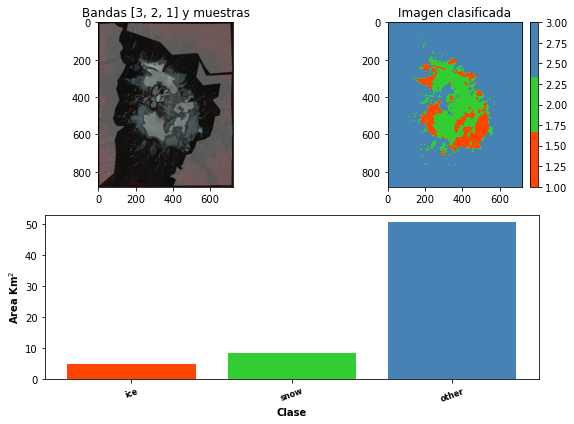

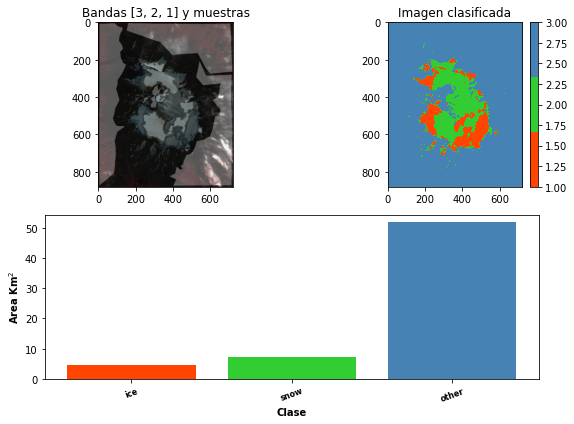

In [2]:
#images = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\raw\*.tif')
#polygons = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\geometry\*.gpkg')

images = [r"P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\raw\20240409T142711_20240409T143454_T18GYA.tif",
          r"P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\raw\20240417T143749_20240417T145322_T18GYA.tif"]
polygons = [r"P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\geometry\2024-04-09.gpkg",
            r"P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\geometry\2024-04-17.gpkg"]


columna = "Uso"

for i in range(len(images)):
    print(images[i])
    print(polygons[i])
    rfclas.rfclas(images[i],polygons[i],columna)

# Cut raster by mask layer
#### QGIS

In [16]:
import glob

raster = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\raw\*forest.tif')
mocho_mask = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Delimitacion\Cuenca_SO_2024 18S.shp'

for i in range(len(raster)):
    date = raster[i][71:-31]
    name = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho_v2\\'+date+'.tif'
    processing.run("gdal:cliprasterbymasklayer", 
                   {'INPUT':str(raster[i]),
                    'MASK':str(mocho_mask),
                    'SOURCE_CRS':None,'TARGET_CRS':None,'NODATA':None,'ALPHA_BAND':False,
                    'CROP_TO_CUTLINE':True,'KEEP_RESOLUTION':True,'SET_RESOLUTION':False,
                    'X_RESOLUTION':None,'Y_RESOLUTION':None,'MULTITHREADING':False,'OPTIONS':'','DATA_TYPE':0,'EXTRA':'',
                    'OUTPUT':str(name)})
    print(name)

P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20231209.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20231224.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20240103.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20240113.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20240125.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20240204.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20240214.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20240229.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20240315.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho\\20240325.tif


# Densidad de nieve distribuida

In [32]:
path = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho_v2\processed\*.tif')


for i in range(len(path)): 
    date = pd.to_datetime(path[i][84:-8]+'-'+path[i][86:-6]+'-'+path[i][80:-10])
    
date_d = ['10-14-2023','12-05-2023','01-27-2024','03-01-2024']

days_med = [np.nan]

for i in range(len(date_d)):
    date_d[i] = pd.to_datetime(date_d[i])
    if i > 0:
        date_ant = pd.to_datetime(date_d[i-1])
        days_med.append((date_d[i]-date_ant).days)

all_dates = []
days = [np.nan]

for i in range(len(path)): 
    date = pd.to_datetime(path[i][84:-8]+'-'+path[i][86:-6]+'-'+path[i][80:-10]) #mes-dia-año
    all_dates.append(date)
    if i > 0:
        date_ant = pd.to_datetime(path[i-1][84:-8]+'-'+path[i-1][86:-6]+'-'+path[i-1][80:-10]) #mes-dia-año
        days.append((date-date_ant).days)
        
pd.DataFrame(all_dates).to_excel(r'P:\Projects\Mocho_DGA\2023-2024\Documents\densidad_distribuida_v2.xlsx')

In [9]:
path = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Evolution_Mocho_v2\*.tif')

#Create a reference mask
raster_tif = rio.open(path[0])

for i in range(len(path)):
    #read raster
    raster = rio.open(path[i]).read(1).astype(np.float64)
    raster[raster==3] = 1
    #Save raster
    date = path[i][70:-4]
    name = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\'+date+'_f.tif'
    raster_r = rio.open(str(name),
                      "w",
                      driver = "GTiff",
                      height = raster.shape[0],
                      width = raster.shape[1],
                      count = 1,
                      nodata = np.nan,
                      dtype = np.float32,
                      crs = 32718,
                      transform = raster_tif.transform)
    raster_r.write(raster,1)
    raster_r.close()
    print(name)

P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20231209_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20231224_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240103_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240113_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240125_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240204_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240214_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240229_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240315_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240325_f.tif
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\\20240409_f.tif

In [45]:
path = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\all\*.tif')
rel = [0.30,0.08,0.05,0.05,0.06,0.05,0.05,0.08,0.08,0.05,0.08,0.04]

raster_tif = rio.open(path[0])

for i in range(len(rel)):
    raster = rio.open(path[i]).read(1).astype(np.float64)
    #date = pd.to_datetime(path[i][75:-8]+'-'+path[i][86:-6]+'-'+path[i][80:-10]) #año-mes-día
    date = path[i][75:-6]
    name = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\'+str(date)+'_rel.tif'
    if i <= 3:
        raster[str(raster)=='nan'] = 900*rel[i] 
        raster[raster==0] = np.nan
        raster[raster==1] = 900*rel[i]
        raster[raster==2] = 593*rel[i]
        print(str(date)+'_1')
    elif i > 3 and  i <= 6:
        raster[str(raster)=='nan'] = 900*rel[i]
        raster[raster==0] = np.nan
        raster[raster==1] = 900*rel[i]
        raster[raster==2] = 612*rel[i]
        print(str(date)+'_2')
    elif i >= 7:
        raster[str(raster)=='nan'] = 900*rel[i]
        raster[raster==0] = np.nan
        raster[raster==1] = 900*rel[i]
        raster[raster==2] = 586*rel[i]
        print(str(date)+'_3')
    if i < 1:
        raster_all = raster
    else:
        raster_all = raster_all+raster
    raster_r = rio.open(str(name),
                      "w",
                      driver = "GTiff",
                      height = raster.shape[0],
                      width = raster.shape[1],
                      count = 1,
                      nodata = np.nan,
                      dtype = np.float32,
                      crs = 32718,
                      transform = raster_tif.transform)
    raster_r.write(raster,1)
    raster_r.close()
    print(name)

20231209_1
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20231209_rel.tif
20231224_1
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20231224_rel.tif
20240103_1
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20240103_rel.tif
20240113_1
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20240113_rel.tif
20240125_2
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20240125_rel.tif
20240204_2
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20240204_rel.tif
20240214_2
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20240214_rel.tif
20240229_3
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20240229_rel.tif
20240315_3
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20240315_rel.tif
20240325_3
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\\20240325_rel.tif


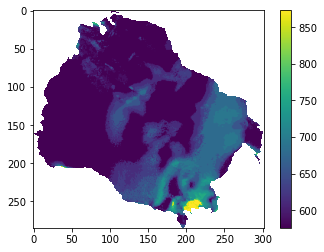

In [46]:
plt.imshow(raster_all)
plt.colorbar()

In [47]:
name = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow_v2\densidad_estival_v2.tif'

raster_r = rio.open(str(name),
                  "w",
                  driver = "GTiff",
                  height = raster.shape[0],
                  width = raster.shape[1],
                  count = 1,
                  nodata = np.nan,
                  dtype = np.float32,
                  crs = 32718,
                  transform = raster_tif.transform)
raster_r.write(raster_all,1)
raster_r.close()

2023-12-09 00:00:00_1
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\\2023-12-09_rel.tif
2023-12-24 00:00:00_1
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\\2023-12-24_rel.tif
2024-01-03 00:00:00_1
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\\2024-01-03_rel.tif
2024-01-13 00:00:00_1
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\\2024-01-13_rel.tif
2024-01-25 00:00:00_2
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\\2024-01-25_rel.tif
2024-02-04 00:00:00_2
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\\2024-02-04_rel.tif
2024-02-14 00:00:00_2
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\\2024-02-14_rel.tif
2024-02-29 00:00:00_3
P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\\2024-02-29_rel.tif


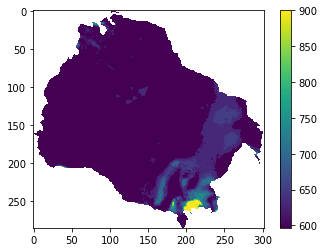

In [65]:
plt.imshow(raster_all)
plt.colorbar()

In [66]:
name = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Distributed_snow\densidad_estival.tif'

raster_r = rio.open(str(name),
                  "w",
                  driver = "GTiff",
                  height = raster.shape[0],
                  width = raster.shape[1],
                  count = 1,
                  nodata = np.nan,
                  dtype = np.float32,
                  crs = 32718,
                  transform = raster_tif.transform)
raster_r.write(raster_all,1)
raster_r.close()

# Make gif Mocho-Choshuenco

In [ ]:
#polygons = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\geometry\*.gpkg')
#mocho_chosh_mask = r'P:\\Projects\\Mocho_DGA\\2023-2024\\GIS\\polygons\\GlaciarVnMochoChoshuenco_2023.gpkg|layername=GlaciarVnMochoChoshuenco_2023'

for i in range(len(raster)):
    date = polygons[i][60:-5]
    mocho_name = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Mocho\\'+str(date)+'_mocho.tif'
    mocho_chosh_name = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Mocho-Choshuenco\\'+str(date)+'_mocho-chosh.tif'
    # processing.run("gdal:cliprasterbymasklayer", 
    #                {'INPUT':str(raster[i]),
    #                 'MASK':str(mocho_chosh_mask),
    #                 'SOURCE_CRS':None,'TARGET_CRS':None,'NODATA':None,'ALPHA_BAND':False,
    #                 'CROP_TO_CUTLINE':True,'KEEP_RESOLUTION':True,'SET_RESOLUTION':False,
    #                 'X_RESOLUTION':None,'Y_RESOLUTION':None,'MULTITHREADING':False,'OPTIONS':'','DATA_TYPE':0,'EXTRA':'',
    #                 'OUTPUT':str(mocho_chosh_name)})
    # print(mocho_chosh_name)
    processing.run("gdal:cliprasterbymasklayer", 
                   {'INPUT':str(raster[i]),
                    'MASK':str(mocho_mask),
                    'SOURCE_CRS':None,'TARGET_CRS':None,'NODATA':None,'ALPHA_BAND':False,
                    'CROP_TO_CUTLINE':True,'KEEP_RESOLUTION':True,'SET_RESOLUTION':False,
                    'X_RESOLUTION':None,'Y_RESOLUTION':None,'MULTITHREADING':False,'OPTIONS':'','DATA_TYPE':0,'EXTRA':'',
                    'OUTPUT':str(mocho_name)})
    print(mocho_name)

C:\Users\pauls\Anaconda3\envs\gee\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


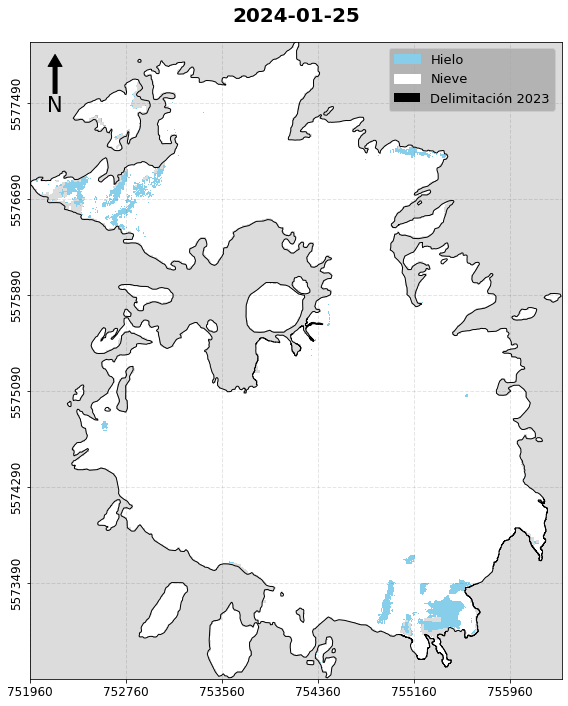

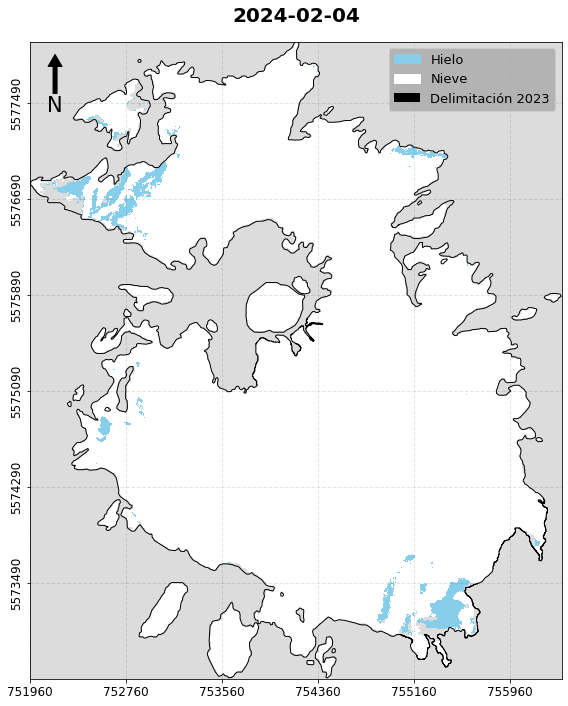

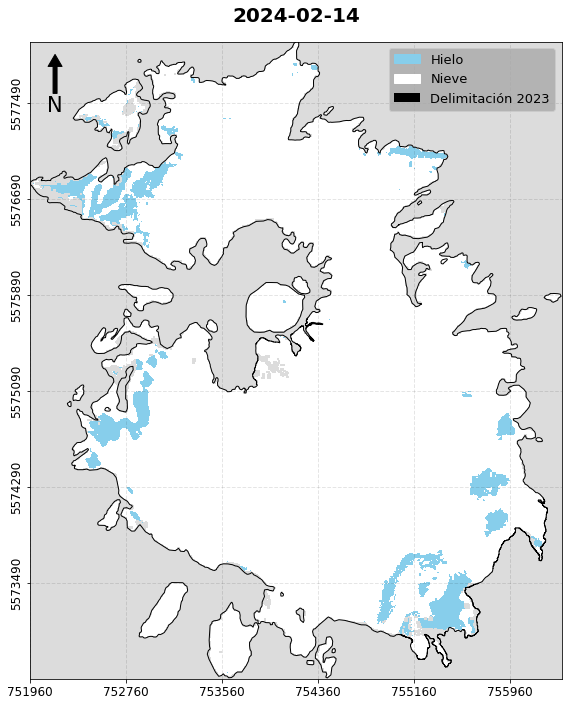

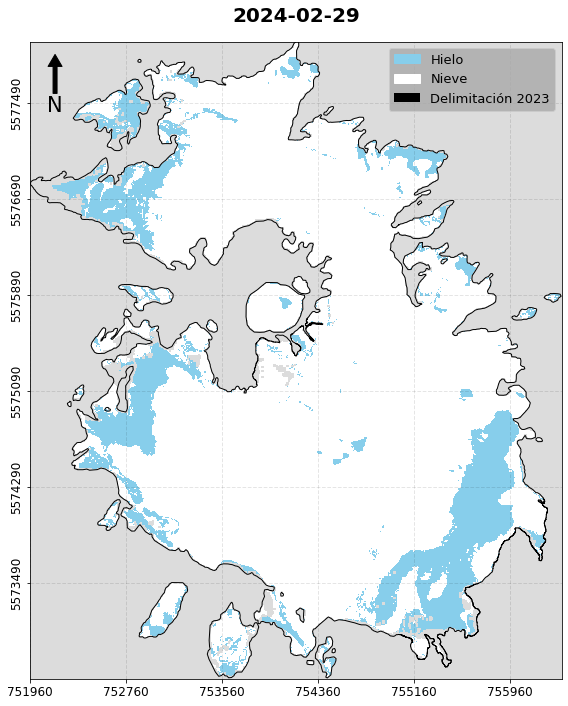

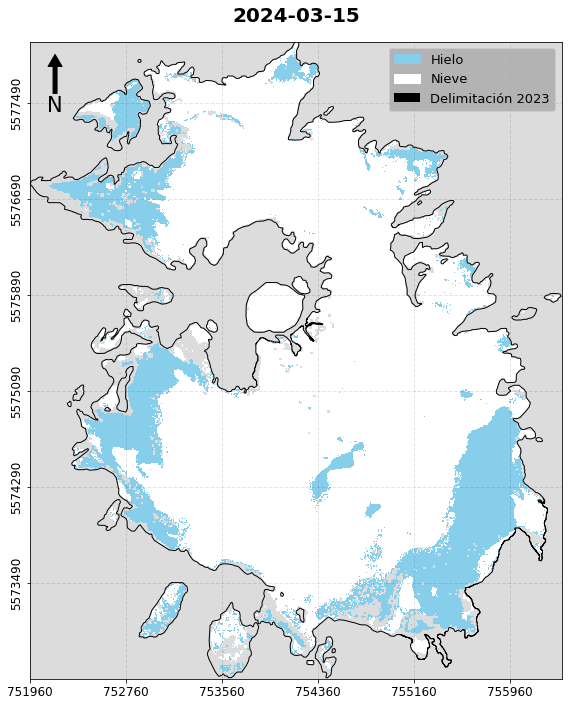

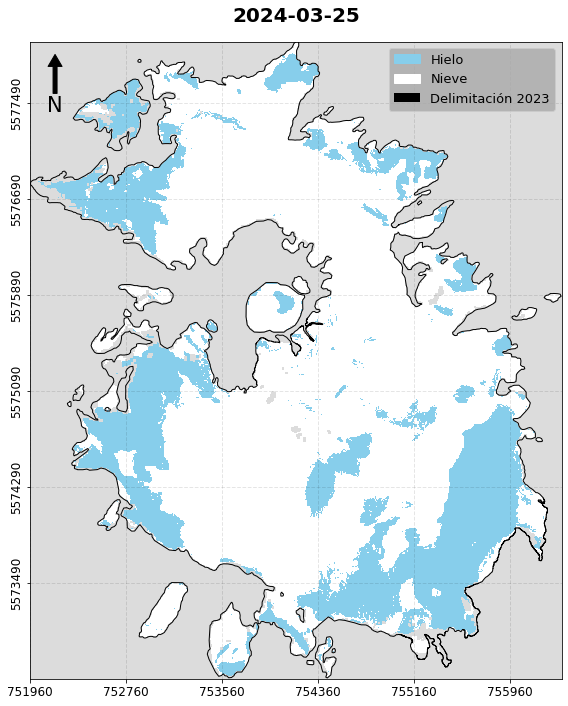

In [117]:
path = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\Mocho-Choshuenco\\*.tif')
mocho_chosh_path = r'P:\\Projects\\Mocho_DGA\\2023-2024\\GIS\\polygons\\GlaciarVnMochoChoshuenco_2023.gpkg'

mocho_chosh = gpd.read_file(mocho_chosh_path)
raster_aux = rio.open(path[0])

#Definir colores y etiquetas
colors = ['skyblue', 'white']
labels = ['Hielo', 'Nieve']

for i in range(len(path)):
    image = rio.open(path[i]).read(1)
    image = np.where(image==3,np.nan,image)
    image = np.where(image==0,np.nan,image)
    ########################### INICIO

    #Define subplots dimensions
    fig = plt.figure(figsize=(8,10))

    #Specific settings
    ax0 = fig.add_subplot(111)
    ax0.set_facecolor("gainsboro")
    ext0 = raster_aux.bounds

    # Mostrar imagen con colores personalizados
    plt.imshow(image,extent=[ext0[0],ext0[2],ext0[1],ext0[3]],cmap=plt.cm.colors.ListedColormap(colors))
    mocho_chosh.plot(ax=ax0,facecolor='None',edgecolor="Black",alpha=1)

    #plt.imshow(test,extent=[ext0[0],ext0[2],ext0[1],ext0[3]])
    plt.xticks(fontsize=8)
    plt.yticks(rotation=90,fontsize=8)
    plt.ticklabel_format(style="plain")

    #name
    name = path[i][68:-16]
    plt.title(name,fontsize=20,pad=20,weight="bold")

    plt.grid(linewidth=1,ls = "--",color="black",alpha=0.1)

    x_ticks = np.arange(ext0[0], ext0[2], 800)
    y_ticks = np.arange(ext0[1]+800, ext0[3], 800)

    plt.yticks(y_ticks,rotation = 90,fontsize=12,va="center")
    plt.xticks(x_ticks,rotation = 0,fontsize=12,ha="center")

    plt.tight_layout()

    basin_legend = mpatches.Patch(color='black', label='Delimitación 2023', linewidth=0.0000000000000000001)

    # Crear leyenda personalizada
    legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]

    legend_patches.append(basin_legend)

    plt.legend(handles=legend_patches,fontsize=13,facecolor='darkgrey')

    #North Arrow
    x, y, arrow_length = 0.047, 0.98, 0.08
    ax0.annotate("N",xy=(x, y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor="Black", edgecolor="Black", width=4, headwidth=14),
                ha="center", va="center", fontsize=21, color="Black",
                xycoords=ax0.transAxes)
    
    gif_name = r'P:\Projects\GlacioUACH\gif_mocho\\'+name+'.png'
    fig.set_facecolor("white")
    plt.show()
    fig.savefig(gif_name)


# Create gif

In [134]:
# Obtener la lista de archivos PNG
files = glob.glob(r'P:\Projects\GlacioUACH\gif_mocho\\*')
files

images = []
for file in files:
    images.append(imageio.imread(file))


# Guardar las imágenes como un archivo GIF
output_path = r'P:\Projects\GlacioUACH\gif_mocho\gif_mocho-choshuenco.gif'  # Ruta y nombre del archivo de salida
imageio.mimsave(output_path, images, duration = 1)


print(f"GIF guardado correctamente en: {output_path}")

C:\Users\pauls\AppData\Local\Temp\ipykernel_9780\3931499715.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))


GIF guardado correctamente en: P:\Projects\GlacioUACH\gif_mocho\gif_mocho-choshuenco.gif


In [131]:
files

['P:\\Projects\\GlacioUACH\\gif_mocho\\2024-01-25.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-02-04.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-02-14.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-02-29.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-03-15.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-03-25.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\gif_mocho-choshuenco.gif']

In [118]:
# Ordenar los archivos por fecha de creación
files_sorted = sorted(files, key=lambda x: os.path.getctime(x))

# Crear una lista para almacenar las imágenes
images = []
for file in files_sorted:
    images.append(imageio.imread(file))

# Guardar las imágenes como un archivo GIF
output_path = r'D:\Modelo_computacional\pp.gif'  # Ruta y nombre del archivo de salida
imageio.mimsave(output_path, images, duration = 2)

print(f"GIF guardado correctamente en: {output_path}")

['P:\\Projects\\GlacioUACH\\gif_mocho\\2024-01-25.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-02-04.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-02-14.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-02-29.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-03-15.png',
 'P:\\Projects\\GlacioUACH\\gif_mocho\\2024-03-25.png']

In [ ]:
for i in range(len(path)):
    plt.imshow(rio.open(path[i]).read(1),cmap='PuBu')
    plt.colorbar(label='mm')
    plt.title(str(i+1));
    name = r'D:\Modelo_computacional\gif\\'+str(i+1)+'.png'
    plt.savefig(name)
    plt.show()

# Mask to Mocho glacier
### QGIS!

In [2]:
import glob
import numpy as np

path = glob.glob(r'P:\Projects\Mocho_DGA\2023-2024\GIS\Sentinel2\*GBR.tif')
mask_path = 'P:/Projects/Mocho_DGA/2022-2023/SIG/Cuenca/Cuenca_SO_2023 18S.shp'

for i in range(len(path)):
    date = path[i][46:-34]
    output_name = r'P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\\'+str(date)+'_clipped.tif'
    processing.run("gdal:cliprasterbymasklayer",
                   {'INPUT':str(path[i]),
                    'MASK':str(mask_path),
                    'SOURCE_CRS':None,'TARGET_CRS':QgsCoordinateReferenceSystem('EPSG:32718'),
                    'NODATA':np.nan,'ALPHA_BAND':False,'CROP_TO_CUTLINE':True,
                    'KEEP_RESOLUTION':False,'SET_RESOLUTION':False,'X_RESOLUTION':10,'Y_RESOLUTION':10,
                    'MULTITHREADING':False,'OPTIONS':'','DATA_TYPE':0,'EXTRA':'',
                    'OUTPUT':str(output_name)})
    print(output)

# Plot data availability

In [6]:
s_dates = ['09-12-2023',
           '24-12-2023',
           '03-01-2024',
           '13-01-2024',
           '25-01-2024',
           '04-02-2024',
           '14-02-2024',
           '29-02-2024',
           '15-03-2024',
           '25-03-2024']
 
    
    
#dates_fw["field_work"] = np.nan

# for i in range(len(dates_fw)):
#     if dates_fw.index[i] == "27-12-2022" or dates_fw.index[i] == "17-02-2023" or dates_fw.index[i] == "15-04-2023":
#         dates_fw.iloc[i,9] = 1
    
s_dates = pd.to_datetime(s_dates,format='%d-%m-%Y')

days = [np.nan]

for i in range(len(s_dates)):
    if i == 9:
        break
    days.append((s_dates[i+1]-s_dates[i]).days)

summary = pd.DataFrame(days,s_dates)
summary.columns = ["días"]

print(summary.mean())

summary.T

días    11.888889
dtype: float64


,2023-12-09,2023-12-24,2024-01-03,2024-01-13,2024-01-25,2024-02-04,2024-02-14,2024-02-29,2024-03-15,2024-03-25
días,NaN,15.0,10.0,10.0,12.0,10.0,10.0,15.0,15.0,10.0


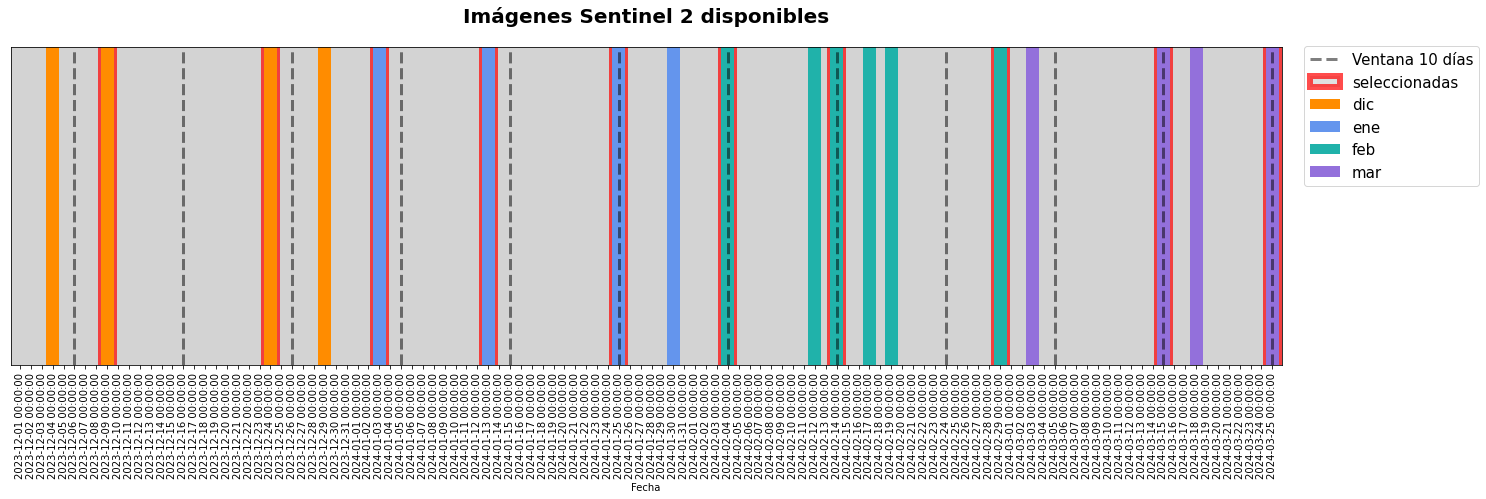

In [15]:
data = pd.read_csv(r"P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\data_2.csv",index_col='Fecha')
data.index = pd.to_datetime(data.index)

#Define subplots dimensions
fig = plt.figure(figsize=(18,12))

#ALL
ax0 = fig.add_subplot(211)
data.iloc[:,4].plot(ax=ax0,color="lightgray",kind="bar",width = 1.2, alpha = 0.7,label="seleccionadas",edgecolor="red",linestyle='-',linewidth=6)

data.iloc[:,0].plot(ax=ax0,color="darkorange",kind="bar",width = 1.2, alpha = 1,label="dic")
data.iloc[:,1].plot(ax=ax0,color="cornflowerblue",kind="bar",width = 1.2, alpha = 1,label="ene")
data.iloc[:,2].plot(ax=ax0,color="lightseagreen",kind="bar",width = 1.2, alpha = 1,label="feb")
data.iloc[:,3].plot(ax=ax0,color="mediumpurple",kind="bar",width = 1.2, alpha = 1,label="mar")
#data.iloc[:,4].plot(ax=ax0,color="lightgray",kind="bar",width = 1.2, alpha = 1,label="seleccionadas",edgecolor="lightgray",linestyle='-',linewidth=4)

#dates_fw.iloc[:,2].plot(ax=ax0,color="lightseagreen",kind="bar",width = 1.2, alpha = 0.8,label="ene")
#dates_fw.iloc[:,3].plot(ax=ax0,color="mediumpurple",kind="bar",width = 1.2, alpha = 0.8,label="feb")
#dates_fw.iloc[:,4].plot(ax=ax0,color="cornflowerblue",kind="bar",width = 1.2, alpha = 1,label="mar")
#dates_fw.iloc[:,5].plot(ax=ax0,color="darkorange",kind="bar",width = 1.2, alpha = 0.7,label="abr")

#data.iloc[:,1].plot(ax=ax0,color="lightgray",kind="bar",width = 0, alpha = 1,label="división",hatch = "//",edgecolor="black",linestyle='--',linewidth=2.5)
#dates_fw.iloc[:,9].plot(ax=ax0,color="red",kind="bar",width = 0, alpha = 1,label="división",hatch = "//",edgecolor="red",linestyle='--',linewidth=2.5)

#Specific settings
ax0.set_facecolor("lightgray")
plt.title("Imágenes Sentinel 2 disponibles",fontweight="bold",fontsize=20,pad=25)

#ticks and label settings
plt.ylim(0, 1)
# plt.xticks(rotation = 90,fontsize=15)
plt.yticks(ticks=[])
# plt.xticks(ticks=[])

plt.axvline(5,0,1, label="Ventana 10 días", color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(15,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(25,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(35,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(45,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(55,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(65,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(75,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(85,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(95,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(105,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(115,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)



#SELECTED
#ax1 = fig.add_subplot(212)
#data.iloc[:,3].plot(ax=ax1,color="red",kind="bar",width = 1.2, alpha = 1,label="seleccionadas",edgecolor="black",linestyle='--',linewidth=2.5)

plt.ylim(0.1, 0.99)

#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.set_facecolor("white")

fig.legend(bbox_to_anchor=(1.15, 0.91),ncol = 1,frameon=True,fontsize=15)

#fig.suptitle("Registro Sentinel-2 glaciar Mocho entre campañas diciembre y abril",fontweight="bold",fontsize=25)
#fig.savefig(r"P:\Projects\Mocho_DGA\2022-2023\Figures\Sentinel2_dic_abr.png",dpi=600, bbox_inches='tight')
plt.show()

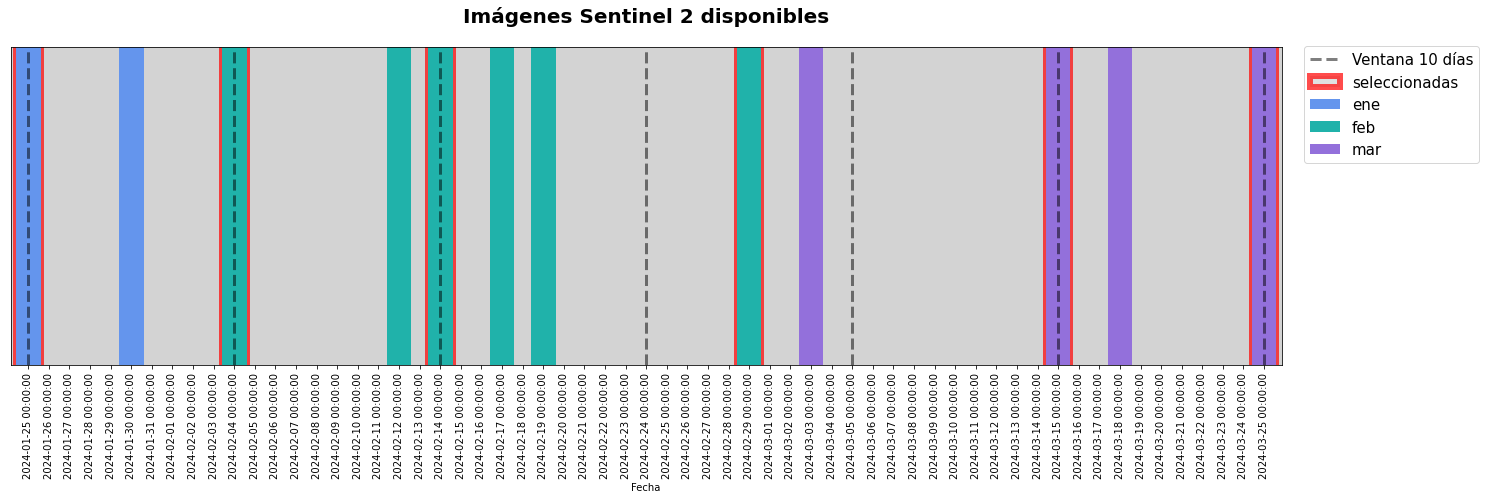

In [9]:
data = pd.read_csv(r"P:\Projects\Mocho_DGA\2023-2024\GIS\Snow_evolution\data.csv",index_col='Fecha')
data.index = pd.to_datetime(data.index)

#Define subplots dimensions
fig = plt.figure(figsize=(18,12))

#ALL
ax0 = fig.add_subplot(211)
data.iloc[:,3].plot(ax=ax0,color="lightgray",kind="bar",width = 1.2, alpha = 0.7,label="seleccionadas",edgecolor="red",linestyle='-',linewidth=6)
data.iloc[:,0].plot(ax=ax0,color="cornflowerblue",kind="bar",width = 1.2, alpha = 1,label="ene")
data.iloc[:,1].plot(ax=ax0,color="lightseagreen",kind="bar",width = 1.2, alpha = 1,label="feb")
data.iloc[:,2].plot(ax=ax0,color="mediumpurple",kind="bar",width = 1.2, alpha = 1,label="mar")
#data.iloc[:,4].plot(ax=ax0,color="lightgray",kind="bar",width = 1.2, alpha = 1,label="seleccionadas",edgecolor="lightgray",linestyle='-',linewidth=4)

#dates_fw.iloc[:,2].plot(ax=ax0,color="lightseagreen",kind="bar",width = 1.2, alpha = 0.8,label="ene")
#dates_fw.iloc[:,3].plot(ax=ax0,color="mediumpurple",kind="bar",width = 1.2, alpha = 0.8,label="feb")
#dates_fw.iloc[:,4].plot(ax=ax0,color="cornflowerblue",kind="bar",width = 1.2, alpha = 1,label="mar")
#dates_fw.iloc[:,5].plot(ax=ax0,color="darkorange",kind="bar",width = 1.2, alpha = 0.7,label="abr")

#data.iloc[:,1].plot(ax=ax0,color="lightgray",kind="bar",width = 0, alpha = 1,label="división",hatch = "//",edgecolor="black",linestyle='--',linewidth=2.5)
#dates_fw.iloc[:,9].plot(ax=ax0,color="red",kind="bar",width = 0, alpha = 1,label="división",hatch = "//",edgecolor="red",linestyle='--',linewidth=2.5)

#Specific settings
ax0.set_facecolor("lightgray")
plt.title("Imágenes Sentinel 2 disponibles",fontweight="bold",fontsize=20,pad=25)

#ticks and label settings
plt.ylim(0, 1)
# plt.xticks(rotation = 90,fontsize=15)
plt.yticks(ticks=[])
# plt.xticks(ticks=[])

plt.axvline(0,0,1, label="Ventana 10 días", color="black",linestyle='--',linewidth=3,alpha=0.5)
#plt.axvline(5,0,1, color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(10,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
#plt.axvline(15,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(20,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
#plt.axvline(25,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(30,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
#plt.axvline(35,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(40,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
#plt.axvline(45,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(50,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)
plt.axvline(60,0,1,color="black",linestyle='--',linewidth=3,alpha=0.5)

#SELECTED
#ax1 = fig.add_subplot(212)
#data.iloc[:,3].plot(ax=ax1,color="red",kind="bar",width = 1.2, alpha = 1,label="seleccionadas",edgecolor="black",linestyle='--',linewidth=2.5)

plt.ylim(0.1, 0.99)

#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.set_facecolor("white")

fig.legend(bbox_to_anchor=(1.15, 0.91),ncol = 1,frameon=True,fontsize=15)

#fig.suptitle("Registro Sentinel-2 glaciar Mocho entre campañas diciembre y abril",fontweight="bold",fontsize=25)
#fig.savefig(r"P:\Projects\Mocho_DGA\2022-2023\Figures\Sentinel2_dic_abr.png",dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
#Define subplots dimensions
fig = plt.figure(figsize=(26,12))

#ALL
ax0 = fig.add_subplot(211)
dates_fw.iloc[:,1].plot(ax=ax0,color="lightcoral",kind="bar",width = 1.2, alpha = 1,label="dic")
dates_fw.iloc[:,2].plot(ax=ax0,color="lightseagreen",kind="bar",width = 1.2, alpha = 0.8,label="ene")
dates_fw.iloc[:,3].plot(ax=ax0,color="mediumpurple",kind="bar",width = 1.2, alpha = 0.8,label="feb")
dates_fw.iloc[:,4].plot(ax=ax0,color="cornflowerblue",kind="bar",width = 1.2, alpha = 1,label="mar")
dates_fw.iloc[:,5].plot(ax=ax0,color="darkorange",kind="bar",width = 1.2, alpha = 0.7,label="abr")
#dates_fw.iloc[:,7].plot(ax=ax0,color="lightgray",kind="bar",width = 0, alpha = 1,label="división",hatch = "//",edgecolor="black",linestyle='--',linewidth=2.5)
#dates_fw.iloc[:,9].plot(ax=ax0,color="red",kind="bar",width = 0, alpha = 1,label="división",hatch = "//",edgecolor="red",linestyle='--',linewidth=2.5)

#Specific settings
ax0.set_facecolor("lightgray")
plt.title("imágenes con nubosidad menor al 30%",fontsize=20,pad=15)

#ticks and label settings
plt.ylim(0, 1)
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(ticks=[])
plt.xticks(ticks=[])

plt.axvline(9,0,1, label="subdivisión",color="black",linestyle='--',linewidth=3)
plt.axvline(19,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(29,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(39,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(49,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(59,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(69,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(79,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(89,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(99,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(-1,0,1,label="visitas a terreno",color="red",linestyle='--',linewidth=4)

#if i == 9 or i == 19 or i == 29 or i == 39 or i == 49 or i == 59 or i == 69 or i == 79 or i == 89 or i == 99:

#SELECTED
ax1 = fig.add_subplot(212)
#dates_fw.iloc[:,7].plot(ax=ax1,color="lightgray",kind="bar",width = 0, alpha = 1,label="",hatch = "//",edgecolor="black",linestyle='--',linewidth=2.5)
dates_fw.iloc[:,8].plot(ax=ax1,color="red",kind="bar",width = 1.2, alpha = 0.3,label="seleccionadas",edgecolor="black",linestyle='--',linewidth=2.5)
#dates_fw.iloc[:,9].plot(ax=ax1,color="lightgray",kind="bar",width = 0, alpha = 1,label="terrenos",hatch = "//",edgecolor="red",linestyle='--',linewidth=2.5)

plt.axvline(9,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(19,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(29,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(39,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(49,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(59,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(69,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(79,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(89,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(99,0,1,color="black",linestyle='--',linewidth=3)

plt.axvline(0,0,1,color="red",linestyle='--',linewidth=4)
plt.axvline(52,0,1,color="red",linestyle='--',linewidth=4)
plt.axvline(len(dates_fw)-1,0,1,color="red",linestyle='--',linewidth=4)


#Specific settings
ax1.set_facecolor("lightgray")
plt.title("imágenes seleccionadas para determinar cobertura de nieve y hielo",fontsize=20,pad=15)

#ticks and label settings
plt.ylim(0, 1)
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(ticks=[])

#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.set_facecolor("white")

fig.legend(bbox_to_anchor=(1.1, 0.91),ncol = 1,frameon=False,fontsize=15)

fig.suptitle("Registro Sentinel-2 glaciar Mocho entre campañas diciembre y abril",fontweight="bold",fontsize=25)
fig.savefig(r"P:\Projects\Mocho_DGA\2022-2023\Figures\Sentinel2_dic_abr.png",dpi=600, bbox_inches='tight')
plt.show()

## Anlisys images dates

In [108]:
path = glob.glob(r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\*GBR.tif")

date_images = []

for i in path:
    date = i[89:-22]+"-"+i[93:-20]+"-"+i[95:-18]
    date_images.append(date)

date_images = pd.to_datetime(date_images)

all_dates = pd.date_range(date_images[0],date_images[len(date_images)-1], freq="d")

dates = pd.date_range(date_images[0],date_images[len(date_images)-1], freq="d")

all_dates = pd.DataFrame(all_dates,all_dates)

all_dates["dic"] = np.nan
all_dates["ene"] = np.nan
all_dates["feb"] = np.nan
all_dates["mar"] = np.nan
all_dates["apr"] = np.nan
all_dates["may"] = np.nan

for i in range(len(all_dates)):
    if all_dates.index[i] == date_images[0] or all_dates.index[i] == date_images[1] or all_dates.index[i] == date_images[2] or all_dates.index[i] == date_images[3] or all_dates.index[i] == date_images[4]:
        all_dates.iloc[i,1] = 1
    elif all_dates.index[i] == date_images[5] or all_dates.index[i] == date_images[6] or all_dates.index[i] == date_images[7] or all_dates.index[i] == date_images[8]:
        all_dates.iloc[i,2] = 1
    elif all_dates.index[i] == date_images[9] or all_dates.index[i] == date_images[10] or all_dates.index[i] == date_images[11]:
        all_dates.iloc[i,2] = 1
    elif all_dates.index[i] == date_images[12] or all_dates.index[i] == date_images[13] or all_dates.index[i] == date_images[14] or all_dates.index[i] == date_images[15]:
        all_dates.iloc[i,3] = 1
    elif all_dates.index[i] == date_images[16] or all_dates.index[i] == date_images[17] or all_dates.index[i] == date_images[18] or all_dates.index[i] == date_images[19] or all_dates.index[i] == date_images[20]:
        all_dates.iloc[i,3] = 1
    elif all_dates.index[i] == date_images[21] or all_dates.index[i] == date_images[22] or all_dates.index[i] == date_images[23] or all_dates.index[i] == date_images[24]:
        all_dates.iloc[i,4] = 1
    elif all_dates.index[i] == all_dates.index[i] == date_images[25] or all_dates.index[i] == date_images[26] or all_dates.index[i] == date_images[27] or all_dates.index[i] == date_images[28] or all_dates.index[i] == date_images[29]:
        all_dates.iloc[i,5] = 1
    elif all_dates.index[i] == date_images[30]:
        all_dates.iloc[i,6] = 1
    else:
        all_dates.iloc[i,0] = np.nan

all_dates.index = pd.to_datetime(dates).strftime('%d-%m-%Y')

dates_fw = all_dates[26:136]

dates_fw["limit"] = np.nan

for i in range(len(dates_fw)):
    if i == 9 or i == 19 or i == 29 or i == 39 or i == 49 or i == 59 or i == 69 or i == 79 or i == 89 or i == 99:
        dates_fw.iloc[i,7] = 1 

dates_fw["selected"] = np.nan

for i in range(len(dates_fw)):
    if dates_fw.index[i] == "31-12-2022" or dates_fw.index[i] == "08-01-2023" or dates_fw.index[i] == "18-01-2023" or dates_fw.index[i] == "28-01-2023" or dates_fw.index[i] == "09-02-2023" or dates_fw.index[i] == "17-02-2023":
        dates_fw.iloc[i,8] = 1
    elif dates_fw.index[i] == "27-02-2023" or dates_fw.index[i] == "11-03-2023" or dates_fw.index[i] == "24-03-2023" or dates_fw.index[i] == "03-04-2023" or dates_fw.index[i] == "13-04-2023":
        dates_fw.iloc[i,8] = 1
        
s_dates = ["31-12-2022",
           "08-01-2023",
           "18-01-2023",
           "28-01-2023",
           "09-02-2023",
           "17-02-2023",
           "27-02-2023",
           "11-03-2023",
           "24-03-2023",
           "03-04-2023",
           "13-04-2023"]
 
    
    
dates_fw["field_work"] = np.nan

for i in range(len(dates_fw)):
    if dates_fw.index[i] == "27-12-2022" or dates_fw.index[i] == "17-02-2023" or dates_fw.index[i] == "15-04-2023":
        dates_fw.iloc[i,9] = 1
    
s_dates = pd.to_datetime(s_dates,format='%d-%m-%Y')

days = [np.nan]

for i in range(len(s_dates)):
    if i == 10:
        break
    days.append((s_dates[i+1]-s_dates[i]).days)

summary = pd.DataFrame(days,s_dates)
summary.columns = ["días"]

summary.T

,2022-12-31,2023-01-08,2023-01-18,2023-01-28,2023-02-09,2023-02-17,2023-02-27,2023-03-11,2023-03-24,2023-04-03,2023-04-13
días,NaN,8.0,10.0,10.0,12.0,8.0,10.0,12.0,13.0,10.0,10.0


#### plot 

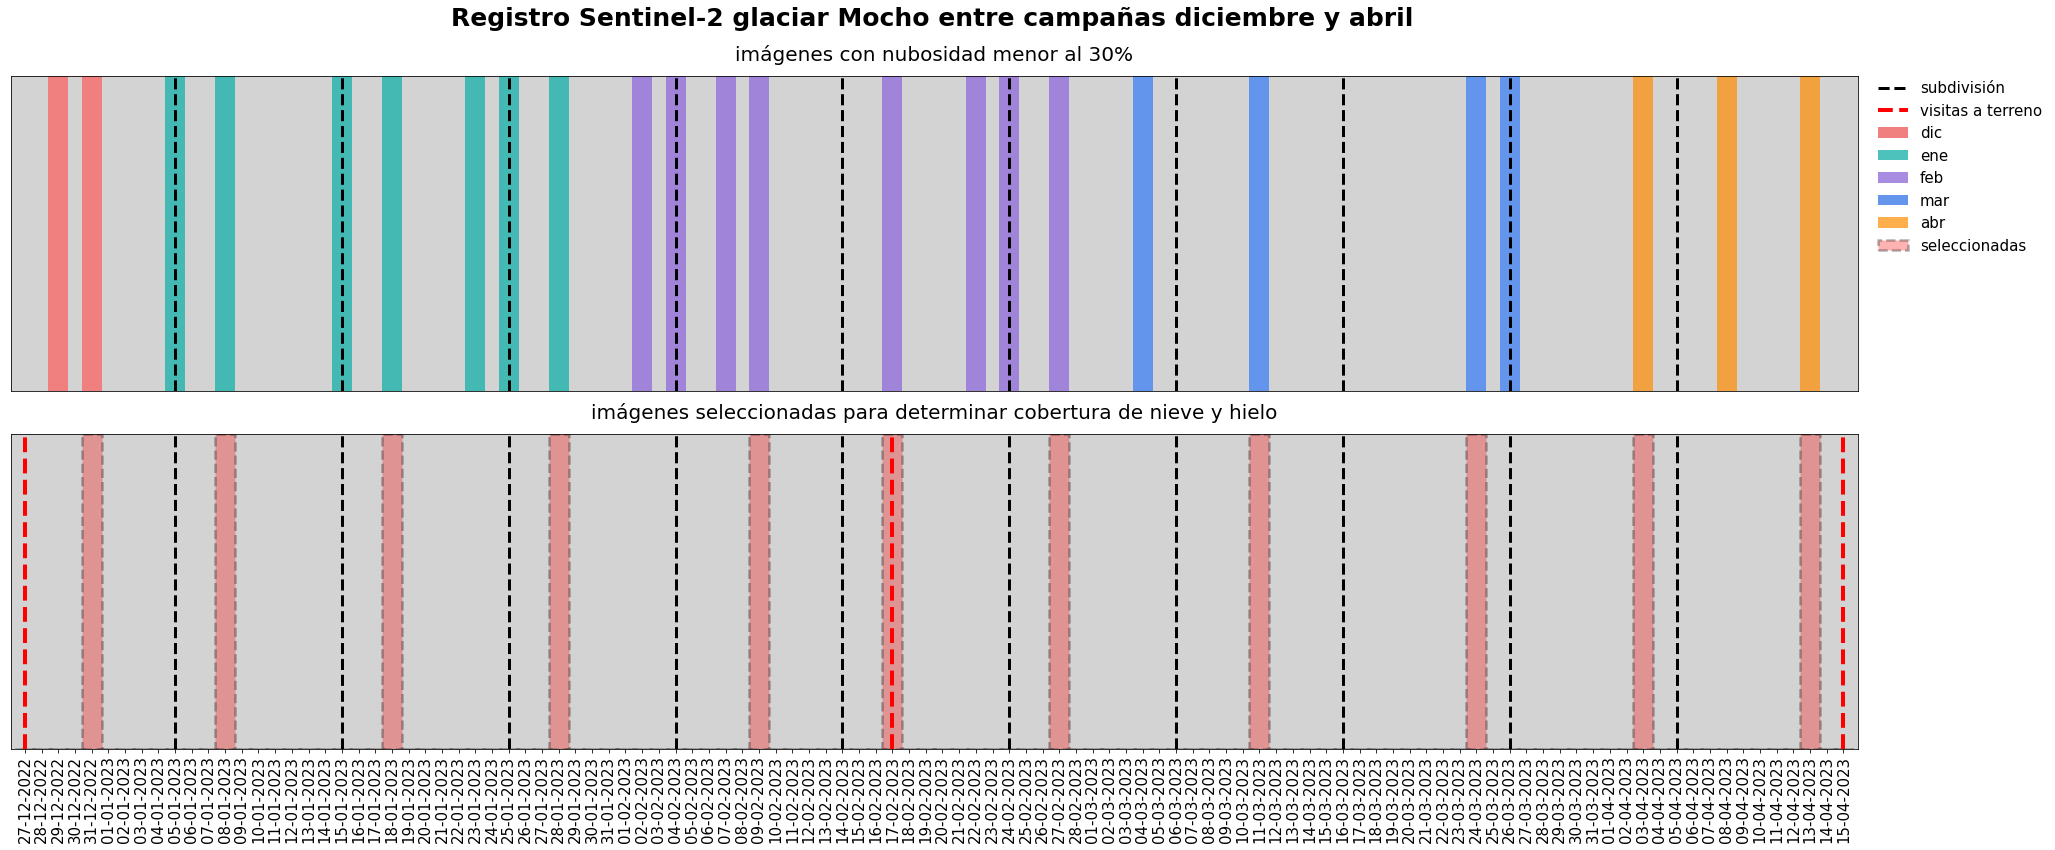

In [116]:
#Define subplots dimensions
fig = plt.figure(figsize=(26,12))

#ALL
ax0 = fig.add_subplot(211)
dates_fw.iloc[:,1].plot(ax=ax0,color="lightcoral",kind="bar",width = 1.2, alpha = 1,label="dic")
dates_fw.iloc[:,2].plot(ax=ax0,color="lightseagreen",kind="bar",width = 1.2, alpha = 0.8,label="ene")
dates_fw.iloc[:,3].plot(ax=ax0,color="mediumpurple",kind="bar",width = 1.2, alpha = 0.8,label="feb")
dates_fw.iloc[:,4].plot(ax=ax0,color="cornflowerblue",kind="bar",width = 1.2, alpha = 1,label="mar")
dates_fw.iloc[:,5].plot(ax=ax0,color="darkorange",kind="bar",width = 1.2, alpha = 0.7,label="abr")
#dates_fw.iloc[:,7].plot(ax=ax0,color="lightgray",kind="bar",width = 0, alpha = 1,label="división",hatch = "//",edgecolor="black",linestyle='--',linewidth=2.5)
#dates_fw.iloc[:,9].plot(ax=ax0,color="red",kind="bar",width = 0, alpha = 1,label="división",hatch = "//",edgecolor="red",linestyle='--',linewidth=2.5)

#Specific settings
ax0.set_facecolor("lightgray")
plt.title("imágenes con nubosidad menor al 30%",fontsize=20,pad=15)

#ticks and label settings
plt.ylim(0, 1)
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(ticks=[])
plt.xticks(ticks=[])

plt.axvline(9,0,1, label="subdivisión",color="black",linestyle='--',linewidth=3)
plt.axvline(19,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(29,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(39,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(49,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(59,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(69,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(79,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(89,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(99,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(-1,0,1,label="visitas a terreno",color="red",linestyle='--',linewidth=4)

#if i == 9 or i == 19 or i == 29 or i == 39 or i == 49 or i == 59 or i == 69 or i == 79 or i == 89 or i == 99:

#SELECTED
ax1 = fig.add_subplot(212)
#dates_fw.iloc[:,7].plot(ax=ax1,color="lightgray",kind="bar",width = 0, alpha = 1,label="",hatch = "//",edgecolor="black",linestyle='--',linewidth=2.5)
dates_fw.iloc[:,8].plot(ax=ax1,color="red",kind="bar",width = 1.2, alpha = 0.3,label="seleccionadas",edgecolor="black",linestyle='--',linewidth=2.5)
#dates_fw.iloc[:,9].plot(ax=ax1,color="lightgray",kind="bar",width = 0, alpha = 1,label="terrenos",hatch = "//",edgecolor="red",linestyle='--',linewidth=2.5)

plt.axvline(9,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(19,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(29,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(39,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(49,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(59,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(69,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(79,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(89,0,1,color="black",linestyle='--',linewidth=3)
plt.axvline(99,0,1,color="black",linestyle='--',linewidth=3)

plt.axvline(0,0,1,color="red",linestyle='--',linewidth=4)
plt.axvline(52,0,1,color="red",linestyle='--',linewidth=4)
plt.axvline(len(dates_fw)-1,0,1,color="red",linestyle='--',linewidth=4)


#Specific settings
ax1.set_facecolor("lightgray")
plt.title("imágenes seleccionadas para determinar cobertura de nieve y hielo",fontsize=20,pad=15)

#ticks and label settings
plt.ylim(0, 1)
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(ticks=[])

#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.set_facecolor("white")

fig.legend(bbox_to_anchor=(1.1, 0.91),ncol = 1,frameon=False,fontsize=15)

fig.suptitle("Registro Sentinel-2 glaciar Mocho entre campañas diciembre y abril",fontweight="bold",fontsize=25)
fig.savefig(r"P:\Projects\Mocho_DGA\2022-2023\Figures\Sentinel2_dic_abr.png",dpi=600, bbox_inches='tight')
plt.show()

#### test image

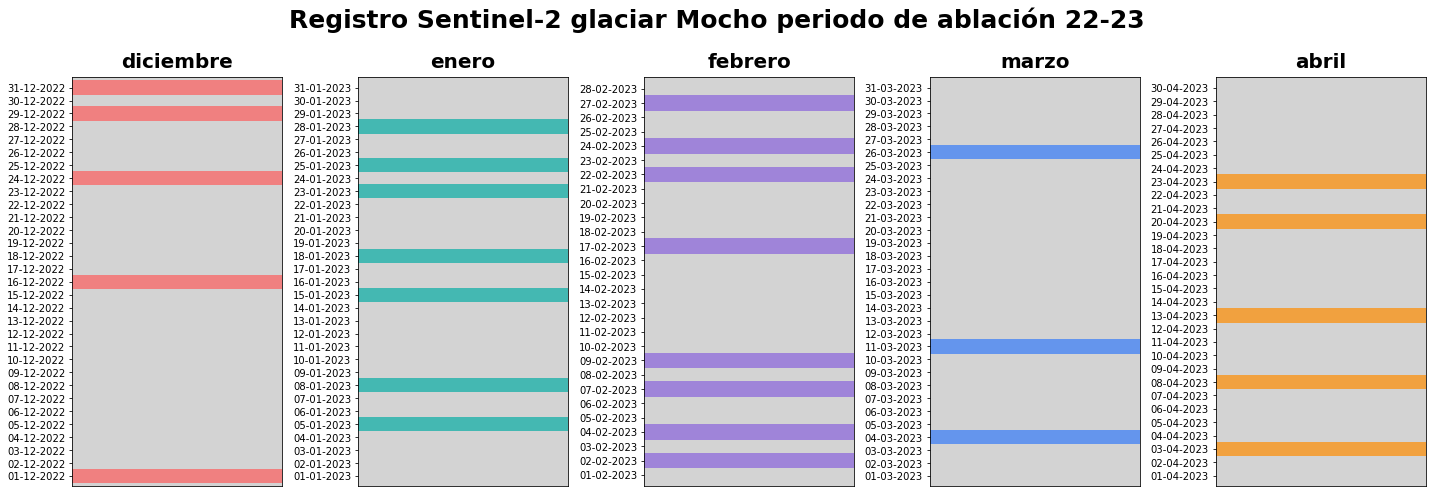

In [214]:
#Define subplots dimensions
fig = plt.figure(figsize=(20,7))

#DICIEMBRE
ax0 = fig.add_subplot(151)
all_dates.iloc[0:31,1].plot(ax=ax0,color="lightcoral",kind="barh",width = 1.1)
#Specific settings
ax0.set_facecolor("lightgray")
plt.title("diciembre",fontsize=20,pad=10,fontweight="bold")
#ticks and label settings
plt.xlim(0, 1)
plt.yticks(rotation = 0,fontsize=10)
plt.xticks(ticks=[])


#ENERO
ax1 = fig.add_subplot(152)
all_dates.iloc[31:62,1].plot(ax=ax1,color="lightseagreen",kind="barh",width = 1.1,alpha=0.8)
#Specific settings
ax1.set_facecolor("lightgray")
plt.title("enero",fontsize=20,pad=10,fontweight="bold")
#ticks and label settings
plt.xlim(0, 1)
plt.yticks(rotation = 0,fontsize=10)
plt.xticks(ticks=[])

#FEBRERO
ax2 = fig.add_subplot(153)
all_dates.iloc[62:90,1].plot(ax=ax2,color="mediumpurple",kind="barh",width = 1.1,alpha=0.8)
#Specific settings
ax2.set_facecolor("lightgray")
plt.title("febrero",fontsize=20,pad=10,fontweight="bold")
#ticks and label settings
plt.xlim(0, 1)
plt.yticks(rotation = 0,fontsize=10)
plt.xticks(ticks=[])

#MARZO
ax3 = fig.add_subplot(154)
all_dates.iloc[90:121,1].plot(ax=ax3,color="cornflowerblue",kind="barh",width = 1.1)
#Specific settings
ax3.set_facecolor("lightgray")
plt.title("marzo",fontsize=20,pad=10,fontweight="bold")
#ticks and label settings
plt.xlim(0, 1)
plt.yticks(rotation = 0,fontsize=10)
plt.xticks(ticks=[])

#ABRIL
ax4 = fig.add_subplot(155)
all_dates.iloc[121:151,1].plot(ax=ax4,color="darkorange",kind="barh",width = 1.1,alpha=0.7)
#Specific settings
ax4.set_facecolor("lightgray")
plt.title("abril",fontsize=20,pad=10,fontweight="bold")
#ticks and label settings
plt.xlim(0, 1)
plt.yticks(rotation = 0,fontsize=10)
plt.xticks(ticks=[])

#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.84)
fig.set_facecolor("white")

fig.suptitle("Registro Sentinel-2 glaciar Mocho periodo de ablación 22-23",fontweight="bold",fontsize=25)
fig.savefig(r"P:\Projects\Mocho_DGA\2022-2023\Figures\Sentinel2_ablationperiod.png",dpi=600) #TOKEN
plt.show()

### Copy and paste data

In [ ]:
path = [r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20221231T142709_20221231T143640_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230108T143731_20230108T145350_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230118T143721_20230118T145253_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230128T143721_20230128T145103_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230209T142709_20230209T143209_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230217T143721_20230217T145142_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230227T143721_20230227T144806_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230311T142719_20230311T143939_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230324T143729_20230324T144337_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230403T143729_20230403T144526_T19GBR.tif",
       r"P:\Projects\Mocho_DGA\SIG\Imagenes_satelitales\Sentinel\estival22-23\GBR\20230413T143729_20230413T145316_T19GBR.tif"]

geom = [r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_22-12-31.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-01-08.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-01-18.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-01-28.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-02-09.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-02-17.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-02-27.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-03-11.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-03-24.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-04-03.shp",
       r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\Random_Forest\RF_23-04-13.shp"]

for i in range(len(path)):
    rf = path[i][:-4]+"_randomforest.tif"
    folder = r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\\"
    date = geom[i][66:-4]
    sentinel = folder+"Sentinel_"+date+".tif"
    shape = folder+"RF_"+date+".shp"
    rftif = folder+"RFSentinel_"+date+".tif"
    shutil.copyfile(path[i], sentinel)
    shutil.copyfile(geom[i], shape)
    shutil.copyfile(rf, rftif)
    print(date)



## Mask random forest to basin

### Work no data values

In [26]:
#Open RF rasters
rf = glob.glob(r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\RFSentinel*")

#Create a reference mask
mask_tif = rio.open(rf[0])
mask = mask_tif.read(1)

#Loop to apply data just a 1 (ice)
for i in rf:
    #Create name
    date = i[66:-4]
    name = r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\RF_"+date+".tif"
    #Read raster
    raster = rio.open(i).read(1).astype(np.float64)
    for x in range(raster.shape[0]):
        for y in range(raster.shape[1]):
            if raster[x,y] == 1:
                raster[x,y] = 1
            elif raster[x,y] == 2:
                raster[x,y] = 2
            else:
                raster[x,y] = np.nan
    #Save raster
    raster_r = rio.open(str(name),
                      "w",
                      driver = "GTiff",
                      height = mask.shape[0],
                      width = mask.shape[1],
                      count = 1,
                      nodata = np.nan,
                      dtype = np.float32,
                      crs = 32718,
                      transform = mask_tif.transform)
    raster_r.write(raster,1)
    raster_r.close()
    print(date)

22-12-31
23-01-08
23-01-18
23-01-28
23-02-09
23-02-17
23-02-27
23-03-11
23-03-24
23-04-03
23-04-13


### Masking in QGIS

In [32]:
import glob

#Open RF rasters
rf = glob.glob(r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\*.tif")

#Mask to cut
mask_shp = r"P:\Projects\Mocho_DGA\2022-2023\SIG\Cuenca\Cuenca_SO_2023 18S.shp"

#Loop to masking
for i in rf:
    #Create name
    date = i[68:-4]
    name = r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_"+date+".tif"
    #masking
    processing.run("gdal:cliprasterbymasklayer", 
                   {'INPUT':str(i),
                    'MASK':str(mask_shp),'SOURCE_CRS':None,'TARGET_CRS':QgsCoordinateReferenceSystem('EPSG:32718'),
                    'NODATA':None,'ALPHA_BAND':False,'CROP_TO_CUTLINE':True,'KEEP_RESOLUTION':False,'SET_RESOLUTION':False,'X_RESOLUTION':None,'Y_RESOLUTION':None,
                    'MULTITHREADING':False,'OPTIONS':'','DATA_TYPE':0,'EXTRA':'',
                    'OUTPUT':str(name)})
    print(date)

P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_22-12-31.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-01-08.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-01-18.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-01-28.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-02-09.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-02-17.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-02-27.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-03-11.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-03-24.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-04-03.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve_23-04-13.tif


In [4]:
import glob

#Open RF rasters
rf = glob.glob(r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\RF*.tif")

#Mask to cut
mask_shp = r"P:\Projects\Mocho_DGA\2022-2023\SIG\Cuenca\mask_evnival.shp"

#Loop to masking
for i in rf:
    #Create name
    date = i[68:-4]
    name = r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_"+date+".tif"
    #masking
    processing.run("gdal:cliprasterbymasklayer", 
                   {'INPUT':str(i),
                    'MASK':str(mask_shp),'SOURCE_CRS':None,'TARGET_CRS':QgsCoordinateReferenceSystem('EPSG:32718'),
                    'NODATA':None,'ALPHA_BAND':False,'CROP_TO_CUTLINE':True,'KEEP_RESOLUTION':False,'SET_RESOLUTION':False,'X_RESOLUTION':None,'Y_RESOLUTION':None,
                    'MULTITHREADING':False,'OPTIONS':'','DATA_TYPE':0,'EXTRA':'',
                    'OUTPUT':str(name)})

P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_22-12-31.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-01-08.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-01-18.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-01-28.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-02-09.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-02-17.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-02-27.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-03-11.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-03-24.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hielo-Nieve_23-04-03.tif
P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\v2\Hi

## Analize stakes

In [106]:
#Open raster with stakes positions
stakes = rio.open(r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\balizas_23-02-17.tif").read(1)

#Open raster with stakes names
stakes_n = rio.open(r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\balizas_23-02-17_names.tif").read(1)

#Generate empty vectors
stakes_pos = []
stakes_name = []

#Append stakes position and names
for x in range(stakes.shape[0]):
    for y in range(stakes.shape[1]):
        if stakes[x,y] == 1:
            stakes_pos.append([x,y])
            stakes_name.append("B"+str(int(stakes_n[x,y])))
            
#Read the RF processed
rf = glob.glob(r"P:\Projects\Mocho_DGA\2022-2023\SIG\mass_balance\RF_v0\processed\Hielo-Nieve*.tif")

#Create empty DF
df = pd.DataFrame()

#Fill DF
for i in rf:
    if i[77:-10] == str("22"):
        date = "2022"+i[79:-4]
    else:
        date = "2023"+i[79:-4]
    values = []
    raster = rio.open(i).read(1).astype(np.float64)
    for j in stakes_pos:
        values.append(raster[j[0],j[1]])
    df[str(date)] = values
    
#Assign index and colnames
df = df.T
df.columns = stakes_name
df.index = pd.to_datetime(df.index).strftime('%d/%m/%Y')

#Create complete vector of dates
all_dates = pd.date_range(df.index[0],df.index[len(df.index)-1], freq="d").strftime('%d/%m/%Y')

#Create a DF with all the dates, all stakes and fill it
stakes_ts = pd.DataFrame(columns = stakes_name,index=all_dates)

for i in range(len(stakes_ts)):
    for j in range(len(df)):
        if stakes_ts.index[i] == df.index[j]:
            stakes_ts.iloc[i,:] = df.iloc[j,:]

stakes_ts.to_csv(r"P:\Projects\Mocho_DGA\2022-2023\mass_balance\nieve-hielo_balizas.csv")

In [117]:
stakes_ts.shape[0]

104